In [2]:
# Necessary Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter

## Insights - Visualisation 

### General Insights for all Products over the Years

In [3]:
df = pd.read_excel('summarized_project_3.xlsx')
df

,Produkttyp,Year,Month,Produkttyp Name,Produzierte Einheiten,Arbeitskosten,Materialkosten,Overhead,Energiekosten,Zielgewinnspanne,Gesamtkosten,Durchschnittliche Kosten pro Einheit,Erforderlicher Verkaufspreis,Bruttogewinnspanne,Gesamtbruttogewinn,Gesamtnettogewinn
0,1,2020,1,Wi-Fi Smelly Socks Detector,3234,53859,4745,6421,12913,0.69,77938,24.099567,77.740539,0.69,173474.90,95536.90
1,1,2020,2,Wi-Fi Smelly Socks Detector,2360,40100,3689,3954,10156,0.69,57899,24.533475,79.140241,0.69,128871.97,70972.97
2,1,2020,3,Wi-Fi Smelly Socks Detector,7168,129729,8898,25794,10738,0.69,175159,24.436244,78.826595,0.69,389870.03,214711.03
3,1,2020,4,Wi-Fi Smelly Socks Detector,5420,108424,6906,18838,7840,0.69,142008,26.200738,84.518510,0.69,316082.32,174074.32
4,1,2020,5,Wi-Fi Smelly Socks Detector,2019,27118,2641,424,16035,0.69,46218,22.891530,73.843647,0.69,102872.32,56654.32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
355,10,2022,8,CheeseStation,327,5916,4913,689,2939,0.97,14457,44.211009,1473.700306,0.97,467443.00,452986.00
356,10,2022,9,CheeseStation,154,3432,2508,1001,979,0.97,7920,51.428571,1714.285714,0.97,256080.00,248160.00
357,10,2022,10,CheeseStation,251,6906,3455,2722,0,0.97,13083,52.123506,1737.450199,0.97,423017.00,409934.00
358,10,2022,11,CheeseStation,376,10086,5551,2413,2451,0.97,20501,54.523936,1817.464539,0.97,662865.67,642364.67


In [4]:
# Create currency formatter

# Normal format
def currency_formatter(x, pos):   
    return f'{x:,.0f}'

# Millions format
def currency_formatter_milion(x, pos):
    return f'{int(x/1e6):,.0f} M'   

# Euro format
def currency_formatter_euro(x, pos):
    return f'{x:,.0f} €'

Gesamtkosten für alle Produkten:       25,059,194.00 €
Gesamtbruttogewinn für alle Produkten: 71,596,911.50 €
Gesamtnettogewinn für alle Produkten:  46,537,717.50 €


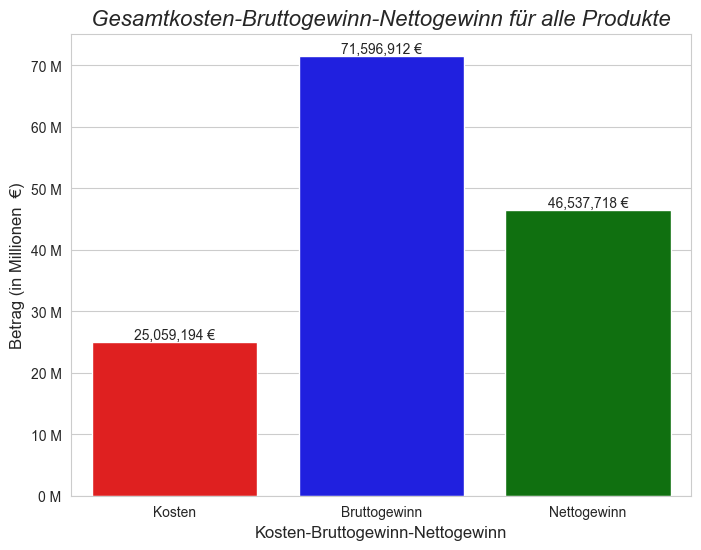

In [5]:
# Total Costs Bruτto Profit and Netto Profit

kosten = df['Gesamtkosten'].sum()
print(f'Gesamtkosten für alle Produkten:       {kosten:,.2f} €')
bruttogewinn = df['Gesamtbruttogewinn'].sum()
print(f'Gesamtbruttogewinn für alle Produkten: {bruttogewinn:,.2f} €')
nettogewinn = df['Gesamtnettogewinn'].sum()
print(f'Gesamtnettogewinn für alle Produkten:  {nettogewinn:,.2f} €')

# Create list of costs and profits to plot them

x = ['Kosten', 'Bruttogewinn', 'Nettogewinn']
y = [kosten, bruttogewinn, nettogewinn]

# Plot Costs - Brutto - Netto
plt.figure(figsize=(8,6))
ax = sns.barplot(x=x, y=y, palette=['red', 'blue', 'green'])

plt.title('Gesamtkosten-Bruttogewinn-Nettogewinn für alle Produkte', fontsize=16, style='italic')
plt.xlabel('Kosten-Bruttogewinn-Nettogewinn', fontsize=12)
plt.ylabel('Betrag (in Millionen  €)', fontsize=12)

ax.yaxis.set_major_formatter(FuncFormatter(currency_formatter_milion))

for i, cost in enumerate(y):
    formatted_cost = '{:,.0f} €'.format(cost)
    ax.annotate(text=formatted_cost,
                xy=(i, cost),
                ha='center', va='bottom')

plt.show()

#plt.savefig('plot_1\\plot1.png')

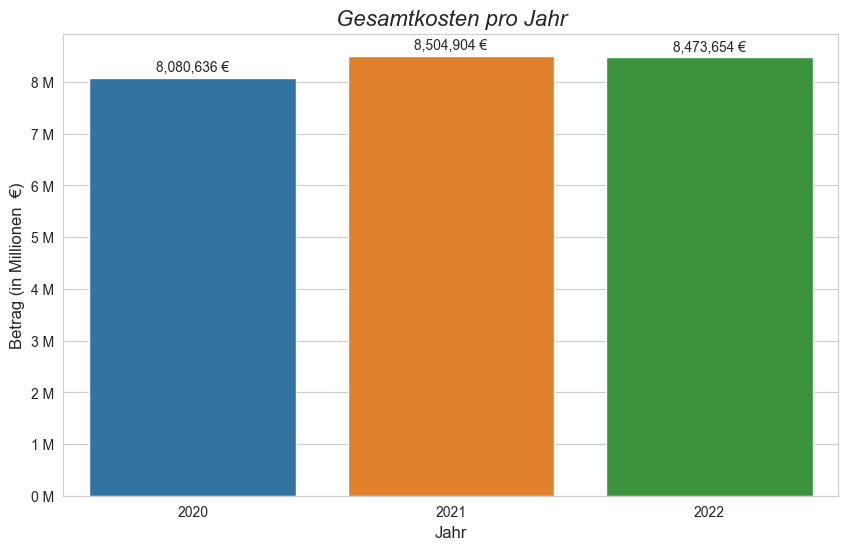

In [6]:
# Bar plot of total 'Gesamtkosten' by 'Year'

plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Year', y='Gesamtkosten', data=df, estimator=sum, errorbar=None)

plt.title('Gesamtkosten pro Jahr', fontsize=16, style='italic')
plt.xlabel('Jahr', fontsize=12)
plt.ylabel('Betrag (in Millionen  €)', fontsize=12)

ax.yaxis.set_major_formatter(FuncFormatter(currency_formatter_milion))

for bar in ax.containers[0]:
    height = bar.get_height()
    formatted_cost = '{:,.0f} €'.format(height)
    ax.annotate(text=formatted_cost,
                xy=(bar.get_x() + bar.get_width() / 2, height-200000),
                xytext=(0, 10),
                textcoords="offset points",
                ha='center', va='bottom')

plt.show()
#plt.savefig('plot_1\\plot2.png')

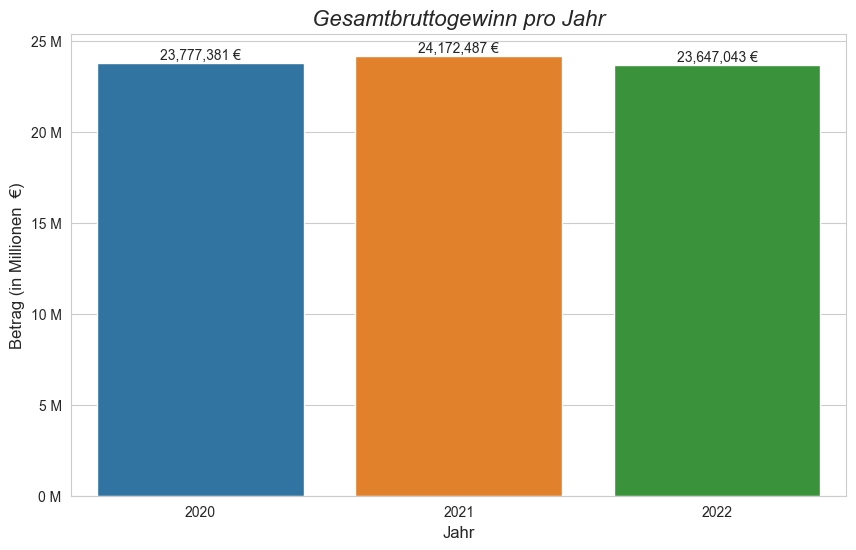

In [7]:
# Bar plot of total 'Gesamtbruttogewinn' by 'Year'

plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Year', y='Gesamtbruttogewinn', data=df, estimator=sum, errorbar=None)

plt.title('Gesamtbruttogewinn pro Jahr', fontsize=16, style='italic')
plt.xlabel('Jahr', fontsize=12)
plt.ylabel('Betrag (in Millionen  €)', fontsize=12)

#ax.set_yticklabels([f'{int(x/1e6):,.0f} M' for x in ax.get_yticks()])
ax.yaxis.set_major_formatter(FuncFormatter(currency_formatter_milion))

for bar in ax.containers[0]:
    height = bar.get_height()
    formatted_cost = '{:,.0f} €'.format(height)
    ax.annotate(text=formatted_cost,
                xy=(bar.get_x() + bar.get_width() / 2, height-700000),
                xytext=(0, 10),
                textcoords="offset points",
                ha='center', va='bottom')

plt.show()
#plt.savefig('plot_1\\plot3.png')

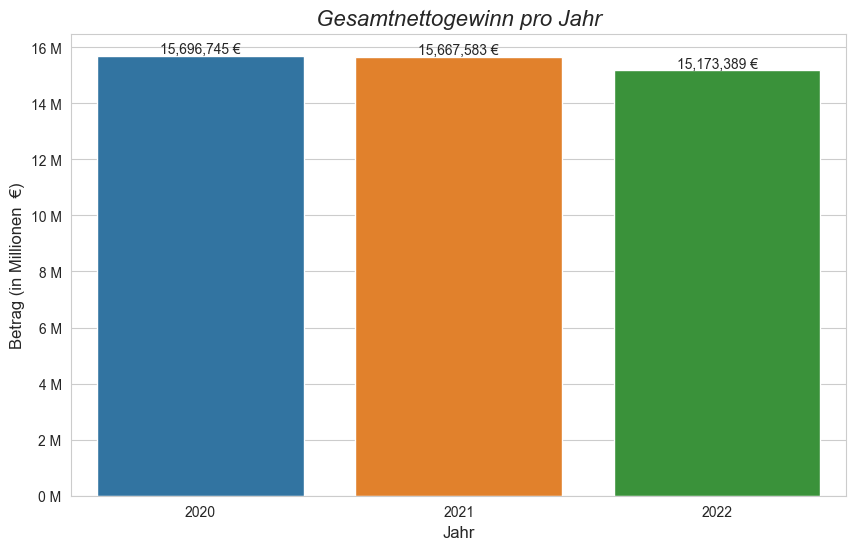

In [8]:
# Bar plot of total 'Gesamtnettogewinn' by 'Year'

plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Year', y='Gesamtnettogewinn', data=df, estimator=sum, errorbar=None)

plt.title('Gesamtnettogewinn pro Jahr', fontsize=16, style='italic')
plt.xlabel('Jahr', fontsize=12)
plt.ylabel('Betrag (in Millionen  €)', fontsize=12)

ax.yaxis.set_major_formatter(FuncFormatter(currency_formatter_milion))

for bar in ax.containers[0]:
    height = bar.get_height()
    formatted_cost = '{:,.0f} €'.format(height)
    ax.annotate(text=formatted_cost,
                xy=(bar.get_x() + bar.get_width() / 2, height-500000),
                xytext=(0, 10),
                textcoords="offset points",
                ha='center', va='bottom')

plt.show()
#plt.savefig('plot_1\\plot4.png')

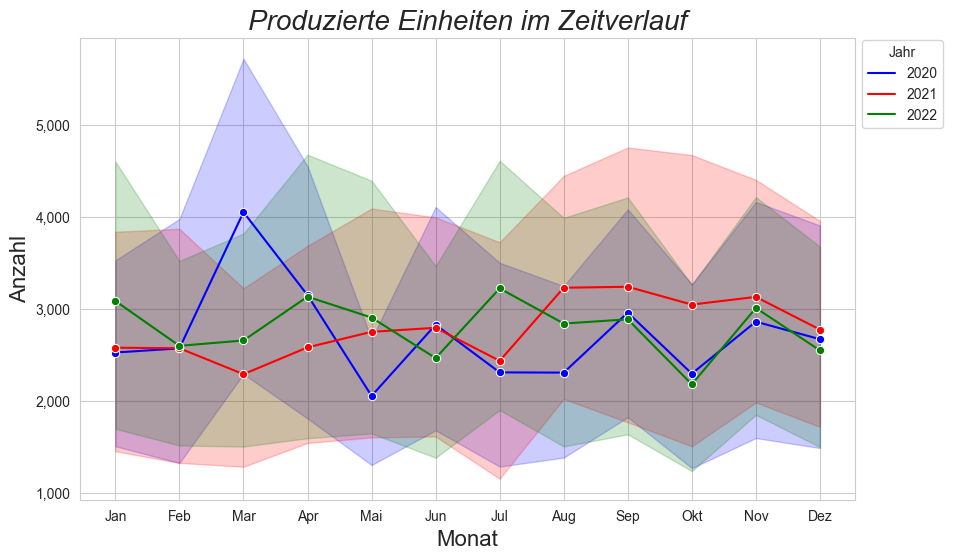

In [9]:
# Line plot of 'Produzierte Einheiten' over time

plt.figure(figsize=(10, 6))
ax = sns.lineplot(x='Month', y='Produzierte Einheiten', hue='Year', data=df, marker='o', palette=['blue', 'red', 'green'])

plt.title('Produzierte Einheiten im Zeitverlauf', fontsize=20, style='italic')
plt.xlabel('Monat', fontsize=16)
plt.ylabel('Anzahl', fontsize=16)

plt.legend(title='Jahr', bbox_to_anchor=(1, 0.9), loc='center left')

ax.yaxis.set_major_formatter(FuncFormatter(currency_formatter))

month_labels = ['Jan', 'Feb', 'Mar', 'Apr', 'Mai', 'Jun', 'Jul', 'Aug', 'Sep', 'Okt', 'Nov', 'Dez']
ax.set_xticks(range(1, 13))
ax.set_xticklabels(month_labels)

plt.show()
#plt.savefig('plot_1\\plot5.png')

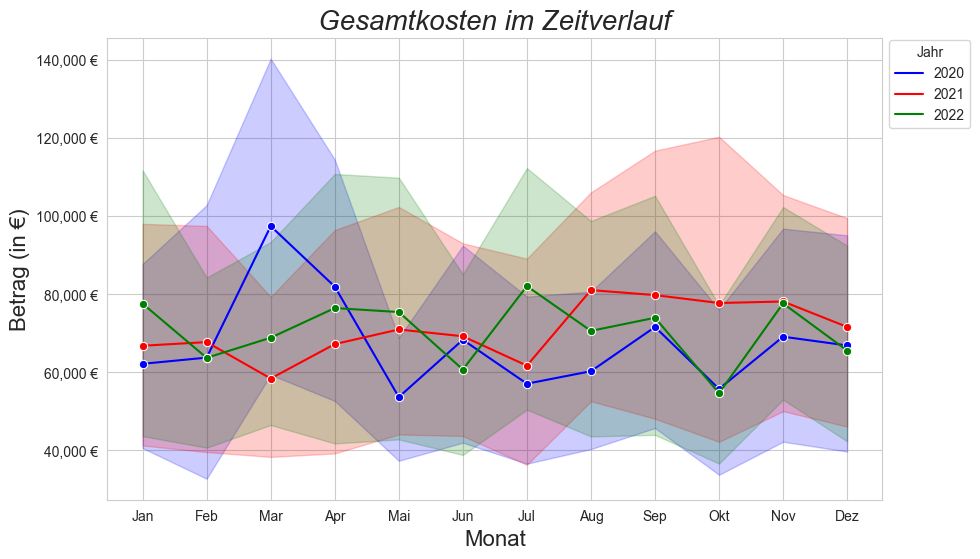

In [10]:
# Line plot of Gesamtkosten over time

plt.figure(figsize=(10, 6))
ax = sns.lineplot(x='Month', y='Gesamtkosten', hue='Year', data=df, marker='o', palette=['blue', 'red', 'green'])

plt.title('Gesamtkosten im Zeitverlauf', fontsize=20, style='italic')
plt.xlabel('Monat', fontsize=16)
plt.ylabel('Betrag (in €)', fontsize=16)

plt.legend(title='Jahr', bbox_to_anchor=(1, 0.9), loc='center left')

ax.yaxis.set_major_formatter(FuncFormatter(currency_formatter_euro))

month_labels = ['Jan', 'Feb', 'Mar', 'Apr', 'Mai', 'Jun', 'Jul', 'Aug', 'Sep', 'Okt', 'Nov', 'Dez']
ax.set_xticks(range(1, 13))
ax.set_xticklabels(month_labels)

plt.show()
#plt.savefig('plot_1\\plot6.png')

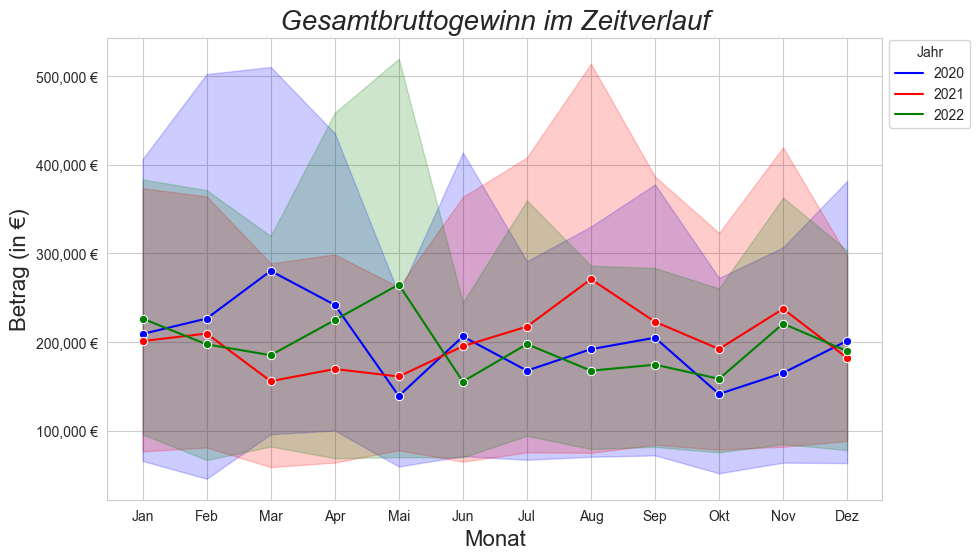

In [11]:
# Line plot of Gesamtbruttogewinn over time

plt.figure(figsize=(10, 6))
ax = sns.lineplot(x='Month', y='Gesamtbruttogewinn', hue='Year', data=df, marker='o', palette=['blue', 'red', 'green'])

plt.title('Gesamtbruttogewinn im Zeitverlauf', fontsize=20, style='italic')
plt.xlabel('Monat', fontsize=16)
plt.ylabel('Betrag (in €)', fontsize=16)

plt.legend(title='Jahr', bbox_to_anchor=(1, 0.9), loc='center left')

ax.yaxis.set_major_formatter(FuncFormatter(currency_formatter_euro))

month_labels = ['Jan', 'Feb', 'Mar', 'Apr', 'Mai', 'Jun', 'Jul', 'Aug', 'Sep', 'Okt', 'Nov', 'Dez']
ax.set_xticks(range(1, 13))
ax.set_xticklabels(month_labels)

plt.show()
#plt.savefig('plot_1\\plot7.png')

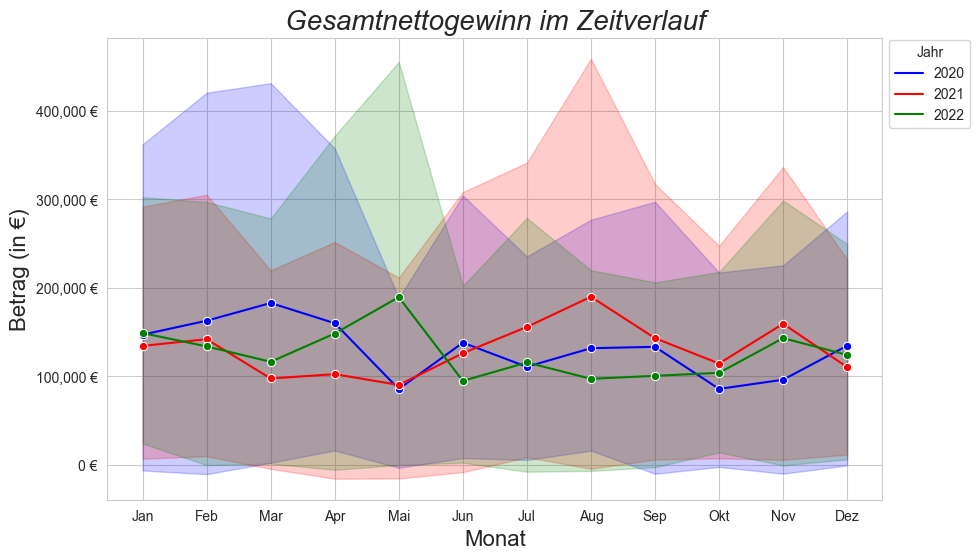

In [12]:
# Line plot of Gesamtnettogewinn over time

plt.figure(figsize=(10, 6))
ax = sns.lineplot(x='Month', y='Gesamtnettogewinn', hue='Year', data=df, marker='o', palette=['blue', 'red', 'green'])

plt.title('Gesamtnettogewinn im Zeitverlauf', fontsize=20, style='italic')
plt.xlabel('Monat', fontsize=16)
plt.ylabel('Betrag (in €)', fontsize=16)

plt.legend(title='Jahr', bbox_to_anchor=(1, 0.9), loc='center left')

ax.yaxis.set_major_formatter(FuncFormatter(currency_formatter_euro))

month_labels = ['Jan', 'Feb', 'Mar', 'Apr', 'Mai', 'Jun', 'Jul', 'Aug', 'Sep', 'Okt', 'Nov', 'Dez']
ax.set_xticks(range(1, 13))
ax.set_xticklabels(month_labels)

plt.show()
#plt.savefig('plot_1\\plot8.png')

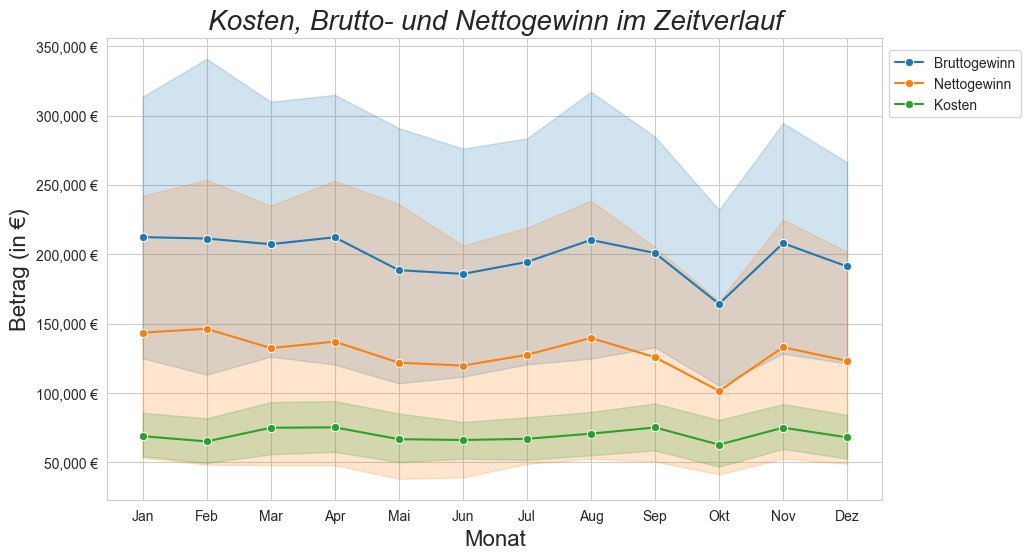

In [13]:
# Line plot of 'Gesamtkosten', 'Gesamtbruttogewinn' and 'Gesamtnettogewinn' over time

plt.figure(figsize=(10, 6))
ax = sns.lineplot(x='Month', y='Gesamtbruttogewinn', data=df, label='Bruttogewinn', marker='o')
sns.lineplot(x='Month', y='Gesamtnettogewinn', data=df, label='Nettogewinn', marker='o')
sns.lineplot(x='Month', y='Gesamtkosten', data=df, label='Kosten', marker='o')

plt.title('Kosten, Brutto- und Nettogewinn im Zeitverlauf', fontsize=20, style='italic')
plt.xlabel('Monat', fontsize=16)
plt.ylabel('Betrag (in €)', fontsize=16)

plt.legend(bbox_to_anchor=(1, 0.9), loc='center left')

ax.yaxis.set_major_formatter(FuncFormatter(currency_formatter_euro))

month_labels = ['Jan', 'Feb', 'Mar', 'Apr', 'Mai', 'Jun', 'Jul', 'Aug', 'Sep', 'Okt', 'Nov', 'Dez']
ax.set_xticks(range(1, 13))
ax.set_xticklabels(month_labels)

plt.show()
#plt.savefig('plot_1\\plot9.png')